In [18]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

AttributeError: module 'tensorflow' has no attribute 'ConfigProto'

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from sklearn.metrics import confusion_matrix, classification_report 
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
   tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
IMAGE_SIZE = 256
CHANNELS = 3

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range =10
)

train_generator = train_datagen.flow_from_directory(
    'C:\\Users\\kiran\\Dental-Model\\dataset\\train',
    target_size = ( IMAGE_SIZE,IMAGE_SIZE),
    batch_size =  32,
    class_mode = 'sparse',

)

Found 8621 images belonging to 6 classes.


In [4]:
train_generator.class_indices

{'Calculus': 0,
 'Data caries': 1,
 'Gingivitis': 2,
 'Mouth Ulcer': 3,
 'Tooth Discoloration': 4,
 'hypodontia': 5}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Calculus',
 'Data caries',
 'Gingivitis',
 'Mouth Ulcer',
 'Tooth Discoloration',
 'hypodontia']

In [6]:
validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range =10
)

validation_generator = validation_datagen.flow_from_directory(
    "C:\\Users\\kiran\\Dental-Model\\dataset\\val",
    target_size = ( IMAGE_SIZE,IMAGE_SIZE),
    batch_size =  32,
    class_mode = 'sparse',

)

Found 1229 images belonging to 6 classes.


In [7]:
test_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range =10
)

test_generator = test_datagen.flow_from_directory(
    "C:\\Users\\kiran\\Dental-Model\\dataset\\test",
    target_size = ( IMAGE_SIZE,IMAGE_SIZE),
    batch_size =  32,
    class_mode = 'sparse',

)

Found 2470 images belonging to 6 classes.


In [13]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 6

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),  
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),                       
])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)       

In [15]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']

)

In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch = 269,
    batch_size = 32,
    validation_data = validation_generator,
    validation_steps = 6,
    verbose = 1,
    epochs = 1
)

UnknownError:  Failed to get convolution plans. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node sequential_1/conv2d_5/Relu (defined at Users\kiran\AppData\Local\Temp\ipykernel_1908\731629536.py:8) ]] [Op:__inference_train_function_1965]

Function call stack:
train_function


In [12]:
scores = model.evaluate(test_generator)

78/78 [==============================] - 23s 290ms/step - loss: 0.6414 - accuracy: 0.7709


In [13]:
scores

[0.6414299011230469, 0.7708501815795898]

In [14]:
history

In [15]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 269}

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [17]:
type(history.history['loss'])

list

In [18]:
history.history['loss'][:5]  #show loss of first 5 epochs

[1.2995134592056274,
 0.9549006223678589,
 0.8081715106964111,
 0.7156055569648743,
 0.6287634372711182]

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [20]:
val_acc

[0.5677083134651184,
 0.6666666865348816,
 0.640625,
 0.71875,
 0.7083333134651184,
 0.71875,
 0.6927083134651184,
 0.75,
 0.6822916865348816,
 0.7916666865348816,
 0.7864583134651184,
 0.7395833134651184,
 0.78125,
 0.7291666865348816,
 0.78125,
 0.7604166865348816,
 0.8125,
 0.78125,
 0.71875,
 0.7864583134651184]

In [21]:
acc

[0.4765397608280182,
 0.6097334027290344,
 0.6679473519325256,
 0.7083479166030884,
 0.7430434226989746,
 0.7536383867263794,
 0.7826289534568787,
 0.8003259897232056,
 0.8204680681228638,
 0.8349050879478455,
 0.8455000519752502,
 0.8553964495658875,
 0.8716963529586792,
 0.8732098937034607,
 0.8771684765815735,
 0.8883455395698547,
 0.8973104953765869,
 0.8978926539421082,
 0.9010362029075623,
 0.9047619104385376]

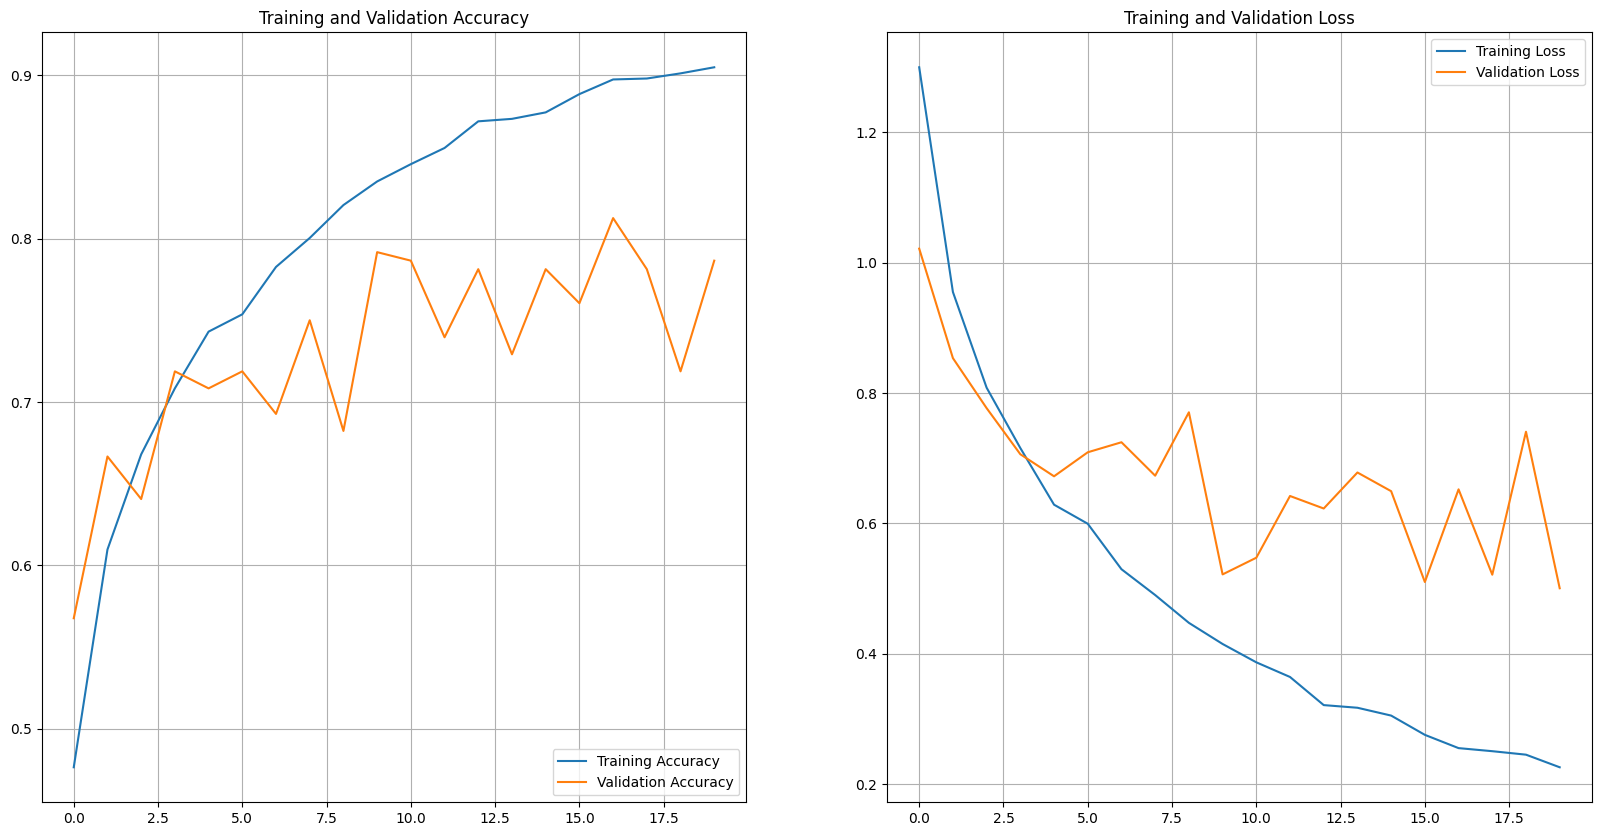

In [22]:
EPOCHS = 20

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid(True)

plt.show()


first image to predict
actual label: Gingivitis
predicted label: Gingivitis


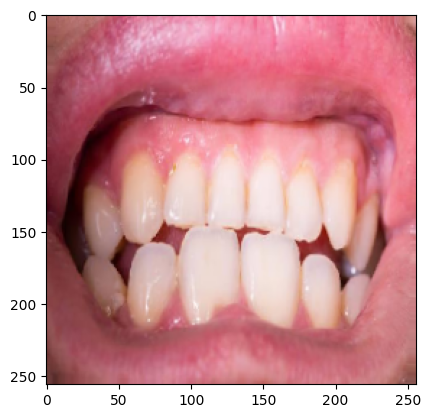

In [23]:
# run Predicition on a Sample Image

import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break  

In [24]:
# function for interference 
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [25]:
  predictions = model.predict(test_generator)
  y_pred = np.round(predictions)

                     precision    recall  f1-score   support

           Calculus       0.10      0.09      0.10       260
        Data caries       0.23      0.22      0.23       521
         Gingivitis       0.20      0.23      0.21       471
        Mouth Ulcer       0.24      0.21      0.22       562
Tooth Discoloration       0.17      0.19      0.18       405
         hypodontia       0.08      0.09      0.09       251

           accuracy                           0.19      2470
          macro avg       0.17      0.17      0.17      2470
       weighted avg       0.19      0.19      0.19      2470



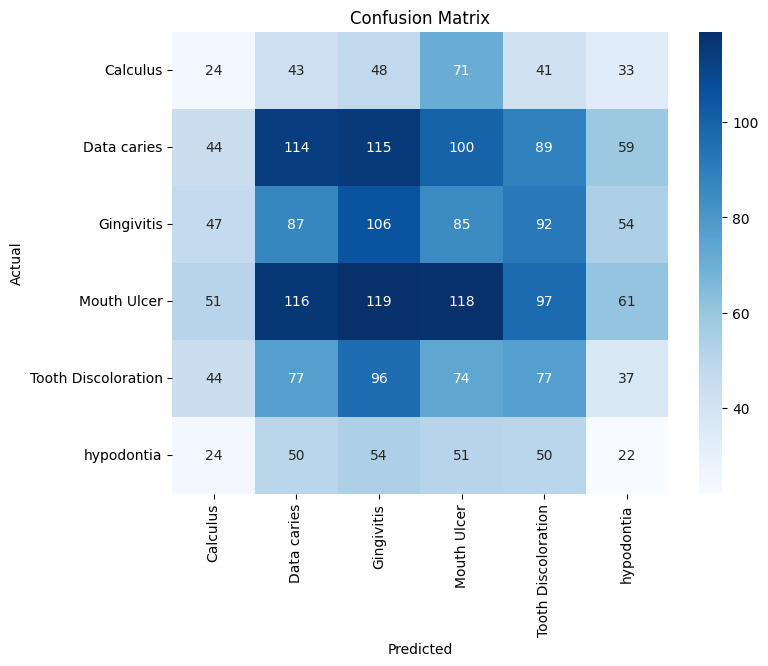

In [32]:
# Confusion Matrix
y_pred_labels = np.argmax(y_pred, axis=1)

print(classification_report(test_generator.classes, y_pred_labels, target_names=class_names))

conf_matrix = confusion_matrix(test_generator.classes, y_pred_labels)
class_names = list(test_generator.class_indices.keys())

plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

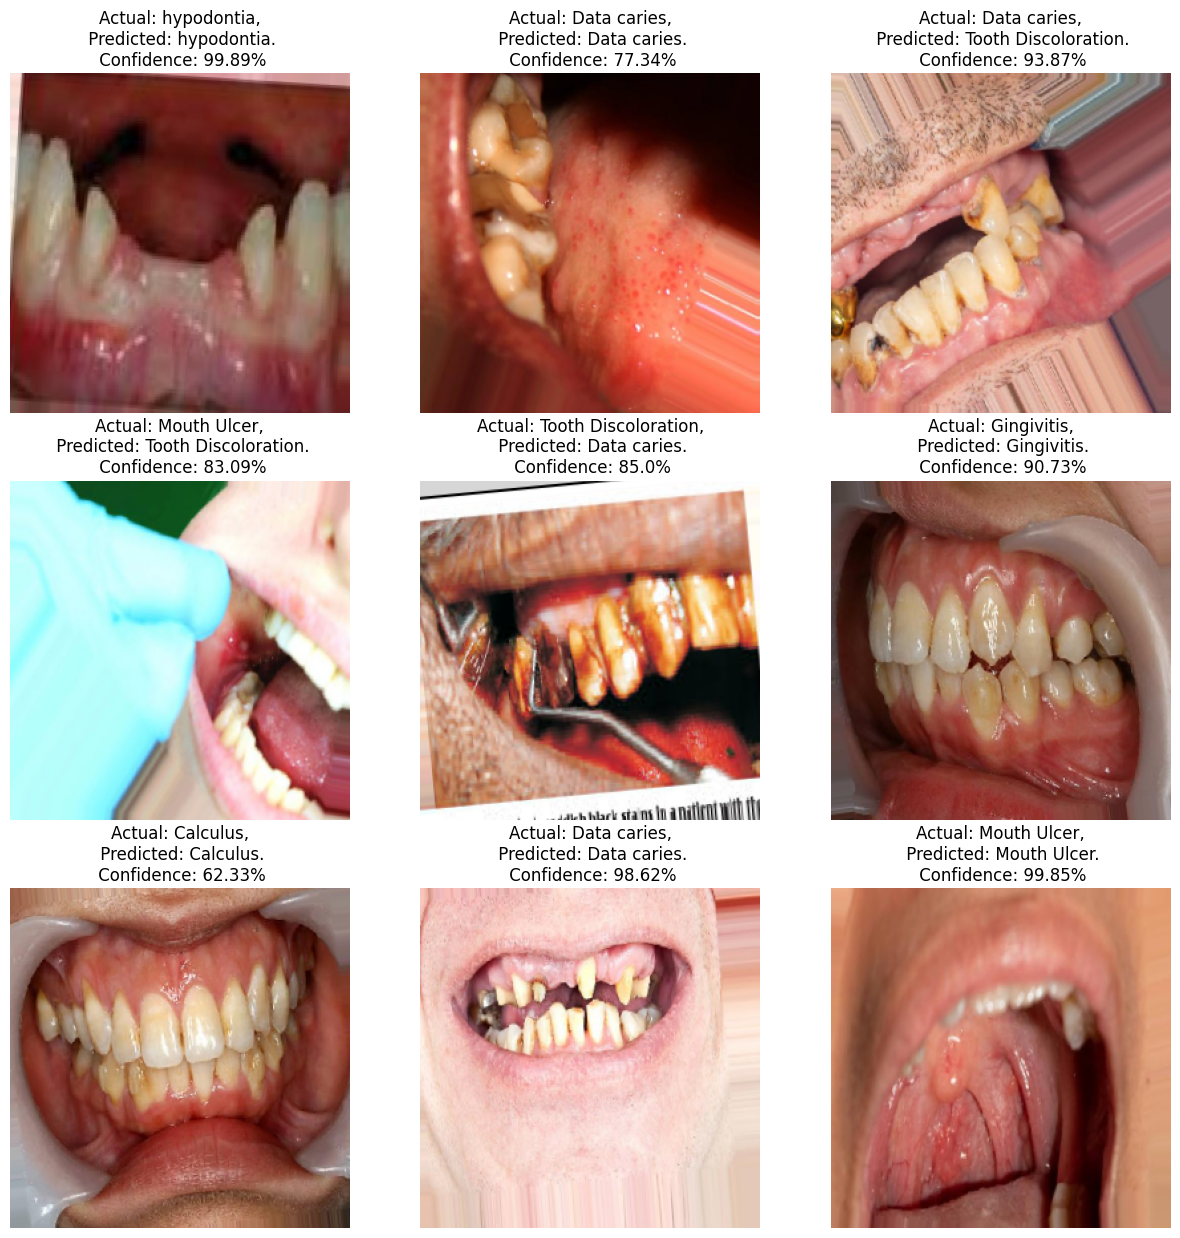

In [33]:
# running interfernce on a few sample images

plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [40]:
model.save("Dental-Model\Models\2") 

INFO:tensorflow:Assets written to: C:\Users\kiran\Dental-Model\Models\2\assets


In [41]:
model.save("dixiIMGv1.h5") 